<center>
    <h1> Unsupervised Clustering Algorithms </h1>
    <h4> by Abhimanyu Singh </h4>
</center>


In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import warnings

# K-Means Clustering

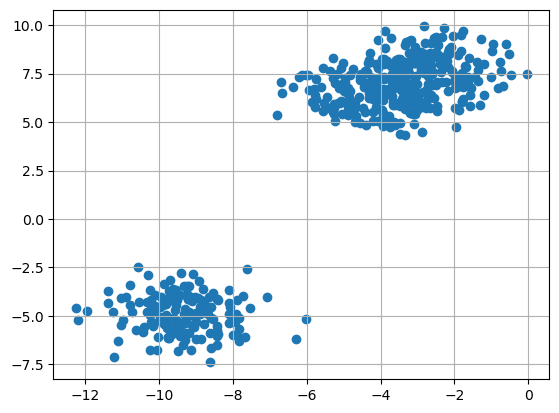

In [2]:
X,y = make_blobs(n_samples = 500,n_features = 2,centers = 3,random_state = random.randint(0,1000))

fig = plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.show()

In [3]:
k = 3

clusters = {}

for idx in range(k):
    center = 2*(2*np.random.random((X.shape[1],))-1)
    points = []
    cluster = {
        'center' : center,
        'points' : []
    }

    clusters[idx] = cluster

clusters

{0: {'center': array([1.96888703, 1.35989116]), 'points': []},
 1: {'center': array([-1.00642734, -0.65636109]), 'points': []},
 2: {'center': array([ 1.15702047, -0.93300187]), 'points': []}}

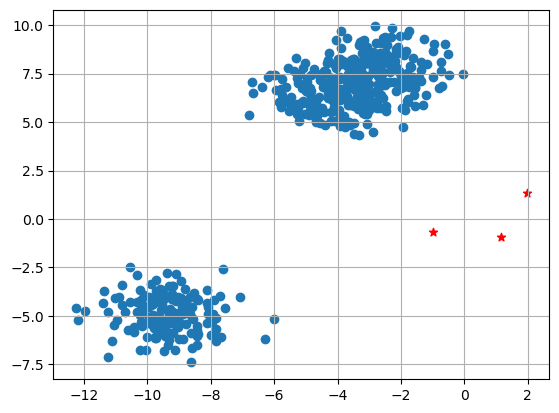

In [4]:
plt.scatter(X[:,0],X[:,1])
plt.grid(True)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '*',c = 'red')
plt.show()

In [5]:
def distance(p1,p2):
    return np.sqrt(np.sum((p1-p2)**2))

In [6]:
#Implementing E step
def assign_clusters(X, clusters):
    for idx in range(X.shape[0]):
        dist = []

        curr_x = X[idx]

        for i in range(k):
            dis = distance(curr_x,clusters[i]['center'])
            dist.append(dis)
        curr_cluster = np.argmin(dist)
        clusters[curr_cluster]['points'].append(curr_x)
    return clusters

#Implementing the M-Step
def update_clusters(X, clusters):
    for i in range(k):
        points = np.array(clusters[i]['points'])
        if points.shape[0] > 0:
            new_center = points.mean(axis =0)
            clusters[i]['center'] = new_center

            clusters[i]['points'] = []
    return clusters

# Create the function to Predict the cluster for the datapoints
def pred_cluster(X, clusters):
    pred = []
    for i in range(X.shape[0]):
        dist = []
        for j in range(k):
            dist.append(distance(X[i],clusters[j]['center']))
        pred.append(np.argmin(dist))
    return pred

In [7]:
# Assign, Update, and predict the cluster center

clusters = assign_clusters(X,clusters)
clusters = update_clusters(X,clusters)
pred = pred_cluster(X,clusters)

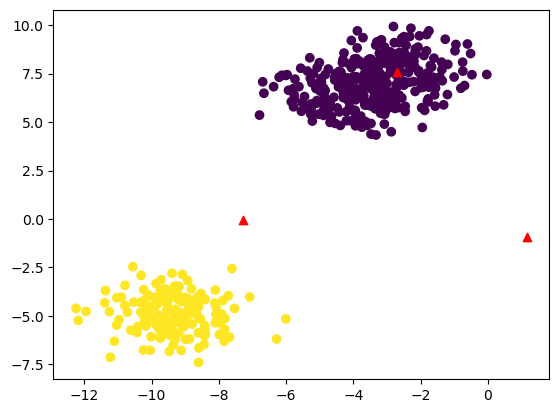

In [8]:
plt.scatter(X[:,0],X[:,1],c = pred)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.show()

## K-means++

K-means++ is an extension of the original k-means clustering algorithm that aims to improve the initial selection of centroids. The initial placement of centroids has a significant impact on the performance and convergence of the k-means algorithm

## Evaluation Metrics for Clustering Algorithms

### Dunn Index

The Dunn index is an evaluation metric used to assess the quality of clustering results. It measures the compactness of clusters and the separation between clusters simultaneously. The Dunn index aims to maximize the inter-cluster distance (separation) while minimizing the intra-cluster distance (compactness).

$$Dunn Index = min_{i≠j} [min_{k} (d(c_i, c_j) / max_{l} d(p_k, q_l))]$$


Where:

 * $d(c_i, c_j)$ is the distance between cluster centroids $c_i$ and $c_j$.
 * $d(p_k, q_l)$ represents the distance between any two data points $p_k$ and $q_l$. It can be any distance metric, such as Euclidean distance or Manhattan distance.


__A higher Dunn index value indicates better clustering, with greater inter-cluster separation and smaller intra-cluster compactness.__

In [9]:
import numpy as np
from scipy.spatial.distance import pdist, squareform